In [1]:
%matplotlib inline
import pandas as pd 

In [4]:
cast=pd.read_csv('cast.csv',index_col= None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [2]:
%matplotlib inline
import pandas as pd 
release_dates=pd.read_csv('release_dates.csv',index_col=None)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# 1.Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

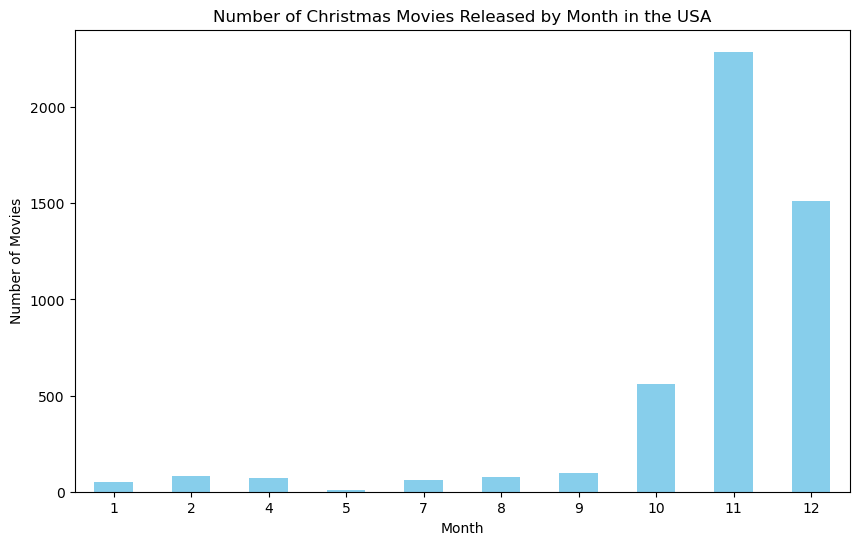

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

cast = pd.read_csv('cast.csv', index_col=None)
release_dates = pd.read_csv('release_dates.csv', index_col=None)

christmas_movies = cast[cast['title'].str.contains('Christmas', case=False)]

usa_christmas_movies = christmas_movies.merge(release_dates, on='title', how='inner')
usa_christmas_movies = usa_christmas_movies[usa_christmas_movies['country'] == 'USA']

usa_christmas_movies['release_month'] = pd.to_datetime(usa_christmas_movies['date']).dt.month

monthly_counts = usa_christmas_movies['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Christmas Movies Released by Month in the USA')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()


# 2.Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.


C:\Users\USER\AppData\Local\Temp\ipykernel_13472\198167521.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_hobbit_usa['month'] = pd.to_datetime(the_hobbit_usa['date']).dt.month


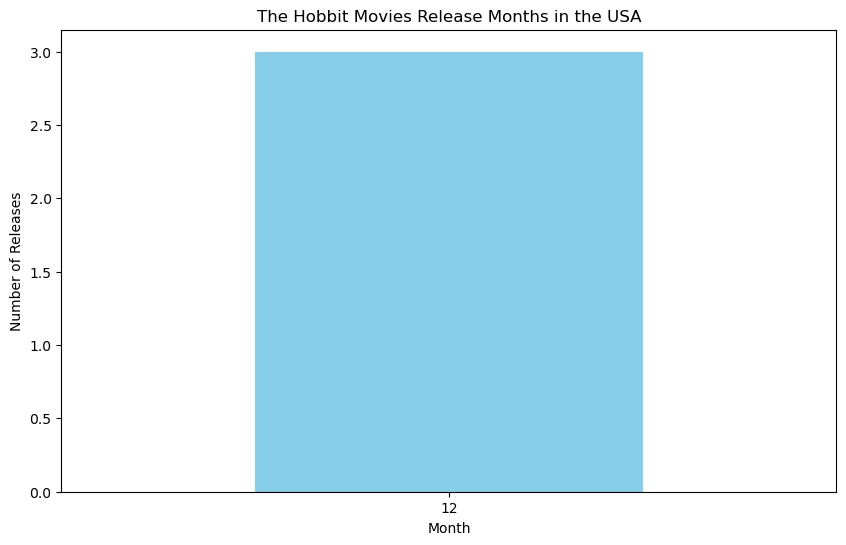

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cast and release_dates data
cast = pd.read_csv('cast.csv', index_col=None)
release_dates = pd.read_csv('release_dates.csv', index_col=None)

# Filter the release_dates dataframe to select movies with titles starting with "The Hobbit" and released in the USA
the_hobbit_usa = release_dates[(release_dates['title'].str.startswith('The Hobbit')) & (release_dates['country'] == 'USA')]

# Extract the month from the release_date column and create a frequency count
the_hobbit_usa['month'] = pd.to_datetime(the_hobbit_usa['date']).dt.month
month_counts = the_hobbit_usa['month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')
plt.title('The Hobbit Movies Release Months in the USA')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=0)
plt.show()

# 3.Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA

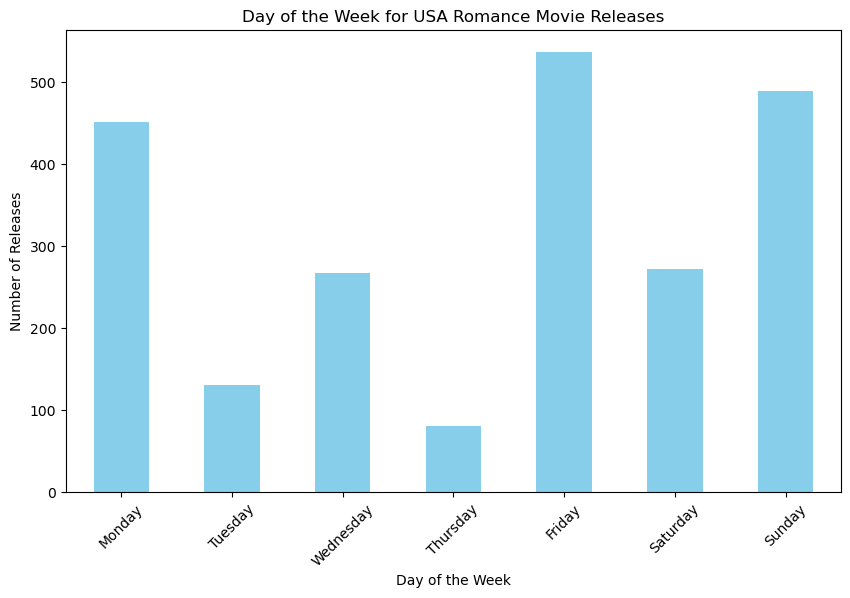

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

romance_movies = cast[cast.title.str.contains('romance', case=False)]

romance_movies_usa = romance_movies.merge(release_dates, on='title')

romance_movies_usa = romance_movies_usa[romance_movies_usa.country == 'USA']

romance_movies_usa['date'] = pd.to_datetime(romance_movies_usa['date'])

romance_movies_usa['day_of_week'] = romance_movies_usa['date'].dt.day_name()

day_of_week_counts = romance_movies_usa['day_of_week'].value_counts()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order)

plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Day of the Week for USA Romance Movie Releases')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


# 4.Make a bar plot of the day of the week on with movies with "action" in their title tend to be released in the USA


C:\Users\USER\AppData\Local\Temp\ipykernel_13472\2761134349.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_movies_usa['date'] = pd.to_datetime(action_movies_usa['date'])


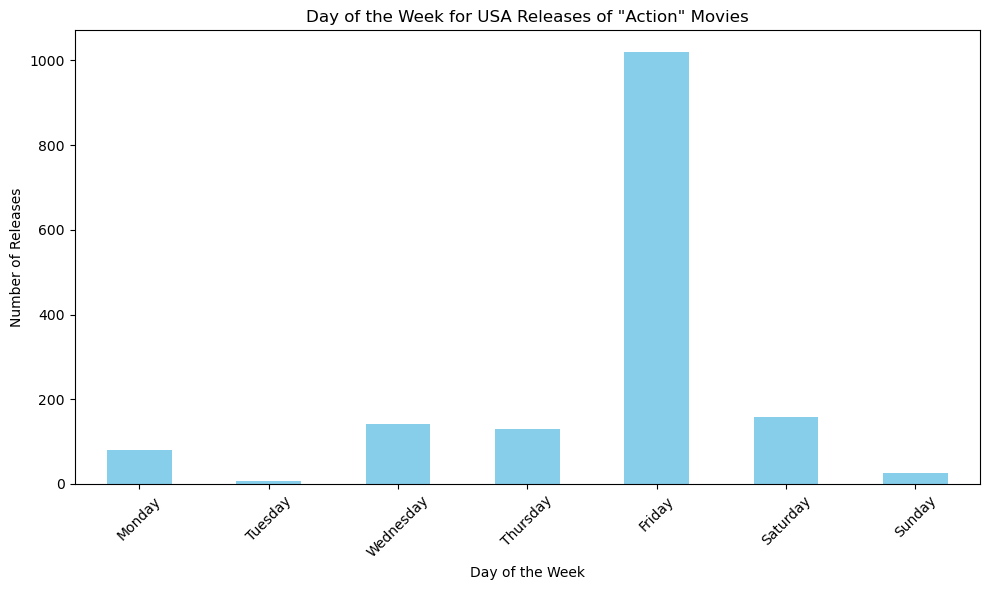

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

cast = pd.read_csv('cast.csv', index_col=None)
release_dates = pd.read_csv('release_dates.csv', index_col=None)

merged_data = pd.merge(cast, release_dates, on='title', how='inner')

action_movies_usa = merged_data[(merged_data['title'].str.contains('action', case=False)) & (merged_data['country'] == 'USA')]

action_movies_usa['date'] = pd.to_datetime(action_movies_usa['date'])

day_of_week_counts = action_movies_usa['date'].dt.day_name().value_counts()
day_of_week_counts = day_of_week_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Day of the Week for USA Releases of "Action" Movies')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.On which date was each judi Dench movie from the 1990s released in the USA




In [8]:
import pandas as pd

cast = pd.read_csv('cast.csv', index_col=None)
release_dates = pd.read_csv('release_dates.csv', index_col=None)

judi_dench_1990s = cast[(cast['name'] == 'Judi Dench') & (cast['year'] >= 1990) & (cast['year'] <= 1999)]

judi_dench_release_dates = pd.merge(judi_dench_1990s, release_dates, on=['title', 'year'])

usa_releases = judi_dench_release_dates[judi_dench_release_dates['country'] == 'USA']

print(usa_releases[['title', 'date']])

                       title        date
1                  GoldenEye  1995-11-17
40                    Hamlet  1996-12-25
71              Jack & Sarah  1996-03-22
78                 Mrs Brown  1997-10-03
101      Shakespeare in Love  1999-01-08
147       Tea with Mussolini  1999-05-14
173  The World Is Not Enough  1999-11-19
246      Tomorrow Never Dies  1997-12-19


# 6.In which months do films with Tom Cruise tend to be released in the USA

In [9]:
import pandas as pd

cast = pd.read_csv('cast.csv', index_col=None)
release_dates = pd.read_csv('release_dates.csv', index_col=None)

merged_data = cast.merge(release_dates, on=['title', 'year'])

judi_dench_films = merged_data[merged_data['name'] == 'Judi Dench']

judi_dench_films['release_date'] = pd.to_datetime(judi_dench_films['date'])
judi_dench_films['release_month'] = judi_dench_films['release_date'].dt.month

release_month_counts = judi_dench_films['release_month'].value_counts().sort_index()

print(release_month_counts)

1     160
2     151
3     185
4      55
5     125
6      37
7      48
8      65
9     125
10    100
11    375
12    182
Name: release_month, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_13472\1547528752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judi_dench_films['release_date'] = pd.to_datetime(judi_dench_films['date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13472\1547528752.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judi_dench_films['release_month'] = judi_dench_films['release_date'].dt.month


# 7.In which months to do films Tom Cruise tend to be released in USA

In [10]:
tom_cruise_films = cast[cast['name'] == 'Tom Cruise']

merged_data = tom_cruise_films.merge(release_dates, on='title', how='inner')

release_months = pd.to_datetime(merged_data['date']).dt.month
month_counts = release_months.value_counts().sort_index()

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

for month_num, count in month_counts.items():
    month_name = month_names[month_num]
    print(f"{month_name}: {count} films")


January: 210 films
February: 128 films
March: 109 films
April: 95 films
May: 106 films
June: 240 films
July: 219 films
August: 185 films
September: 169 films
October: 186 films
November: 108 films
December: 155 films
